<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/CIFAR10-ANN/blob/Code/Cifar10ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers.core.flatten import Flatten
from keras.backend import conv2d
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import scale
#from keras.models import Sequential #Su tuan tu
from keras.layers import Conv2D,Activation,MaxPooling2D #Dense la tao ra, ket noi phan tu
from tensorflow.keras.optimizers import RMSprop,SGD
import numpy as np
from keras.callbacks import EarlyStopping

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
X = x_test
Y = y_test
(x_train,y_train),(x_test,y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


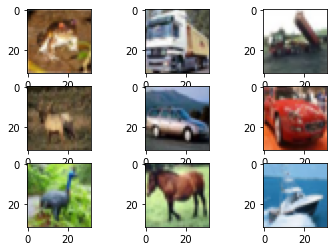

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=100, batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
782/782 [==============================] - 8s 10ms/step - loss: 0.0832 - accuracy: 0.2754 - val_loss: 0.0837 - val_accuracy: 0.2721
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0764 - accuracy: 0.3647 - val_loss: 0.0835 - val_accuracy: 0.2963
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0739 - accuracy: 0.3944 - val_loss: 0.0739 - val_accuracy: 0.3925
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0721 - accuracy: 0.4119 - val_loss: 0.0708 - val_accuracy: 0.4266
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0707 - accuracy: 0.4293 - val_loss: 0.0753 - val_accuracy: 0.3876
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0695 - accuracy: 0.4409 - val_loss: 0.0739 - val_accuracy: 0.3953
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 0.0685 - accuracy: 0.4503 - val_loss: 0.0747 - val_accuracy: 0.407

In [ ]:
model.evaluate (x_train, y_train)
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la:',score[0])
print('do chinh xac kiem tra la:',score[1])

1563/1563 [==============================] - 4s 2ms/step - loss: 0.0489 - accuracy: 0.6430
sai so kiem tra la: 0.07282871752977371
do chinh xac kiem tra la: 0.47519999742507935


In [ ]:
model.save('cifar10.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('cifar10.h5')

In [ ]:
y_test[4000:4001]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
result=model.predict(x_test[4000:4001])
result

array([[3.8550043e-01, 7.2992034e-02, 1.5333724e-01, 1.7959743e-03,
        7.1534641e-02, 1.0942887e-02, 1.0422576e-04, 1.1359782e-01,
        3.1092342e-02, 1.5910237e-01]], dtype=float32)

In [ ]:
x_test[4000:4001]

array([[[[0.47843137, 0.58431375, 0.7176471 ],
         [0.47843137, 0.5568628 , 0.6627451 ],
         [0.4862745 , 0.5529412 , 0.6392157 ],
         ...,
         [0.6745098 , 0.44705883, 0.3647059 ],
         [0.5647059 , 0.3882353 , 0.32941177],
         [0.44313726, 0.32941177, 0.30980393]],

        [[0.4862745 , 0.59607846, 0.7294118 ],
         [0.4627451 , 0.54509807, 0.63529414],
         [0.46666667, 0.5372549 , 0.60784316],
         ...,
         [0.5686275 , 0.4509804 , 0.42745098],
         [0.5411765 , 0.37254903, 0.3529412 ],
         [0.4509804 , 0.29803923, 0.29803923]],

        [[0.49411765, 0.5921569 , 0.72156864],
         [0.45490196, 0.52156866, 0.59607846],
         [0.45882353, 0.53333336, 0.58431375],
         ...,
         [0.44313726, 0.43137255, 0.5137255 ],
         [0.5686275 , 0.35686275, 0.3882353 ],
         [0.5137255 , 0.19215687, 0.22352941]],

        ...,

        [[0.72156864, 0.7254902 , 0.6784314 ],
         [0.70980394, 0.72156864, 0.654902  ]

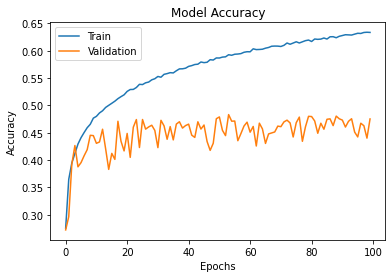

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
cifar_10_Label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

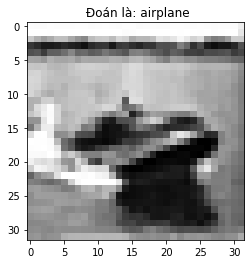

In [ ]:
test = 150
plt.title(" Đoán là: " +
str(cifar_10_Label[np.argmax(model.predict(X[test].reshape(-1,32,32,3)))]))
Y[test]
plt.imshow(X[test],
cmap=plt.get_cmap('gray'))